# SENG 454: Assignment 2

## k-fold cross validation

In [2]:
# Function to compute 0-1 loss (misclassification error)
def compute_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Function to implement k-fold cross-validation
# changed slightly from a1 to use numpy arrays instead of dataframes
def k_fold_cross_validation(X, y, k=5, model=None, random_state=None):
    """
    Perform k-fold cross-validation.

    Parameters:
    - X: Features (numpy array).
    - y: Target (numpy array).
    - k: Number of folds (default is 5).
    - model: The machine learning model to evaluate.
    - random_state: Seed for reproducibility.

    Returns:
    - average_error: Average error across all folds.
    """
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X_shuffled = X[indices]  # Use NumPy array indexing
    y_shuffled = y[indices]  # Use NumPy array indexing

    error_scores = []
    fold_size = len(X) // k

    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size if i < k - 1 else len(X)
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error = compute_error(y_test, y_pred)
        error_scores.append(error)
        print(f"Fold {i + 1} error: {error:.4f}")

    average_error = np.mean(error_scores)
    return average_error

---

## Data loading & preproccessing

In [9]:
import mnist_reader
import numpy as np

# Load the dataset
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Filter training data for classes 5 and 7
train_mask = (y_train == 5) | (y_train == 7)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

# Filter test data for classes 5 and 7
test_mask = (y_test == 5) | (y_test == 7)
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# Ensure 1000 examples for each class in the training set
class_5_indices = np.where(y_train == 5)[0]
class_7_indices = np.where(y_train == 7)[0]

# Randomly select 1000 examples for each class
np.random.seed(42)  # For reproducibility
selected_class_5_indices = np.random.choice(class_5_indices, 500, replace=False)
selected_class_7_indices = np.random.choice(class_7_indices, 500, replace=False)

# Combine the selected indices
selected_indices = np.concatenate([selected_class_5_indices, selected_class_7_indices])

# Shuffle the selected indices
np.random.shuffle(selected_indices)

# Create the reduced training set
X_train_reduced = X_train[selected_indices]
y_train_reduced = y_train[selected_indices]

# Shuffle the training data
indices = np.arange(len(X_train_reduced))
np.random.shuffle(indices)
X_train_reduced = X_train_reduced[indices]
y_train_reduced = y_train_reduced[indices]

# Relabel training data
y_train_reduced[y_train_reduced == 5] = 0
y_train_reduced[y_train_reduced == 7] = 1

# Relabel test data
y_test[y_test == 5] = 0
y_test[y_test == 7] = 1

# Check
print("Reduced training data shape:", X_train_reduced.shape)
print("Reduced training labels shape:", y_train_reduced.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Rescale the inputs to the range [0, 1]
X_train_reduced = X_train_reduced / 255.0
X_test = X_test / 255.0

# Print the minimum and maximum values to verify rescaling
print("Training data - min:", X_train_reduced.min(), "max:", X_train_reduced.max())
print("Test data - min:", X_test.min(), "max:", X_test.max())

# Add label noise to the training set
p = 0.2
y_train_reduced_n = y_train_reduced.copy()

for i in range(len(y_train_reduced_n)):
    if np.random.rand() < p:
        y_train_reduced_n[i] = 1 - y_train_reduced_n[i]

# Test
print("Original labels:", y_train_reduced[:10])
print("Noisy labels:", y_train_reduced_n[:10])

# Check the noisy dataset
print("Noisy training labels shape:", y_train_reduced_n.shape)

Reduced training data shape: (1000, 784)
Reduced training labels shape: (1000,)
Test data shape: (2000, 784)
Test labels shape: (2000,)
Training data - min: 0.0 max: 1.0
Test data - min: 0.0 max: 1.0
Original labels: [1 1 1 0 0 1 0 0 0 0]
Noisy labels: [1 0 1 0 0 1 0 0 0 0]
Noisy training labels shape: (1000,)


---

## Part 1: SVM w Linear Kernel

Fold 1 error: 0.2400
Fold 2 error: 0.2250
Fold 3 error: 0.2200
Fold 4 error: 0.2900
Fold 5 error: 0.2400
Fold 1 error: 0.2250
Fold 2 error: 0.2200
Fold 3 error: 0.2200
Fold 4 error: 0.2750
Fold 5 error: 0.2250
Fold 1 error: 0.2200
Fold 2 error: 0.2000
Fold 3 error: 0.2150
Fold 4 error: 0.2600
Fold 5 error: 0.2300
Fold 1 error: 0.2200
Fold 2 error: 0.2050
Fold 3 error: 0.2150
Fold 4 error: 0.2450
Fold 5 error: 0.2250
Fold 1 error: 0.2500
Fold 2 error: 0.2350
Fold 3 error: 0.2250
Fold 4 error: 0.2500
Fold 5 error: 0.2150
Fold 1 error: 0.2600
Fold 2 error: 0.2300
Fold 3 error: 0.2150
Fold 4 error: 0.2500
Fold 5 error: 0.2400
Fold 1 error: 0.2600
Fold 2 error: 0.2400
Fold 3 error: 0.2150
Fold 4 error: 0.2700
Fold 5 error: 0.2900
Fold 1 error: 0.2700
Fold 2 error: 0.2450
Fold 3 error: 0.2350
Fold 4 error: 0.2900
Fold 5 error: 0.2850
Fold 1 error: 0.2850
Fold 2 error: 0.2800
Fold 3 error: 0.2550
Fold 4 error: 0.2850
Fold 5 error: 0.3000
Fold 1 error: 0.3000
Fold 2 error: 0.2950
Fold 3 error:

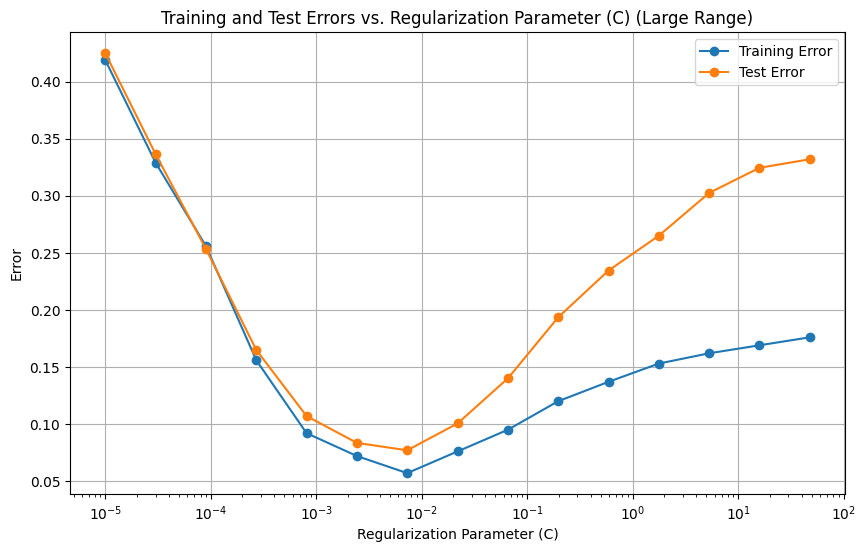

Train errors: 

[np.float64(0.419), np.float64(0.329), np.float64(0.256), np.float64(0.156), np.float64(0.092), np.float64(0.072), np.float64(0.057), np.float64(0.076), np.float64(0.095), np.float64(0.12), np.float64(0.137), np.float64(0.153), np.float64(0.162), np.float64(0.169), np.float64(0.176)]
Test errors: 
:
[np.float64(0.425), np.float64(0.3365), np.float64(0.2535), np.float64(0.165), np.float64(0.107), np.float64(0.0835), np.float64(0.077), np.float64(0.1005), np.float64(0.14), np.float64(0.1935), np.float64(0.2345), np.float64(0.265), np.float64(0.3025), np.float64(0.3245), np.float64(0.332)]


In [10]:
from sklearn.svm import LinearSVC

# Define a logarithmically spaced grid for C
C0 = 1e-3  # Initial value for C
beta = 2    # Base for logarithmic spacing
num_values = 10  # Number of C values to try
C_values = [C0 * (beta ** i) for i in range(num_values)]

# C_values = np.logspace(-3, 3, num=10)


# Initialize lists to store errors
train_errors = []
test_errors = []

# Perform k-fold cross-validation to select the optimal C
k = 5  # Number of folds for cross-validation
best_score = float('inf')
best_C = None

# Step 1: Hyperparameter tuning using k-fold cross-validation (on training set only)
for C in C_values:
    # Initialize the linear SVM
    # svm = LinearSVC(C=C, max_iter=10000) \
    svm = LinearSVC(C=C) 

    # Perform k-fold cross-validation
    cv_error = k_fold_cross_validation(X_train_reduced, y_train_reduced_n, k=k, model=svm, random_state=42)

    # Track the best C
    if cv_error < best_score:
        best_score = cv_error
        best_C = C

# Print the optimal C
print(f"Optimal C: {best_C}")


# Step 4: Plot training and test errors for a larger range of C values
# Define a larger range of C values for the final graph
C0_large = 1e-5  # Smaller initial value for C
beta_large = 3   # Larger base for logarithmic spacing
num_values_large = 15  # More C values to try
C_values_large = [C0_large * (beta_large ** i) for i in range(num_values_large)]

train_errors_large = []
test_errors_large = []

for C in C_values_large:
    # svm = LinearSVC(C=C, max_iter=10000)
    svm = LinearSVC(C=C, max_iter=10000)
    svm.fit(X_train_reduced, y_train_reduced_n)
    train_errors_large.append(compute_error(y_train_reduced, svm.predict(X_train_reduced))) # Use not noisy data!
    test_errors_large.append(compute_error(y_test, svm.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values_large, train_errors_large, label='Training Error', marker='o')
plt.plot(C_values_large, test_errors_large, label='Test Error', marker='o')
plt.xscale('log')  # Use logarithmic scale for C
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Error')
plt.title('Training and Test Errors vs. Regularization Parameter (C) (Large Range)')
plt.legend()
plt.grid()
plt.show()


print("Train errors: \n")
print(train_errors_large)
print("Test errors: \n:")
print(test_errors_large)

### Analysis: (Discuss results)

## Part 2: SVM, Gaussian Kernel

Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error: 0.4550
Fold 4 error: 0.4500
Fold 5 error: 0.4950
Fold 1 error: 0.5400
Fold 2 error: 0.4900
Fold 3 error:

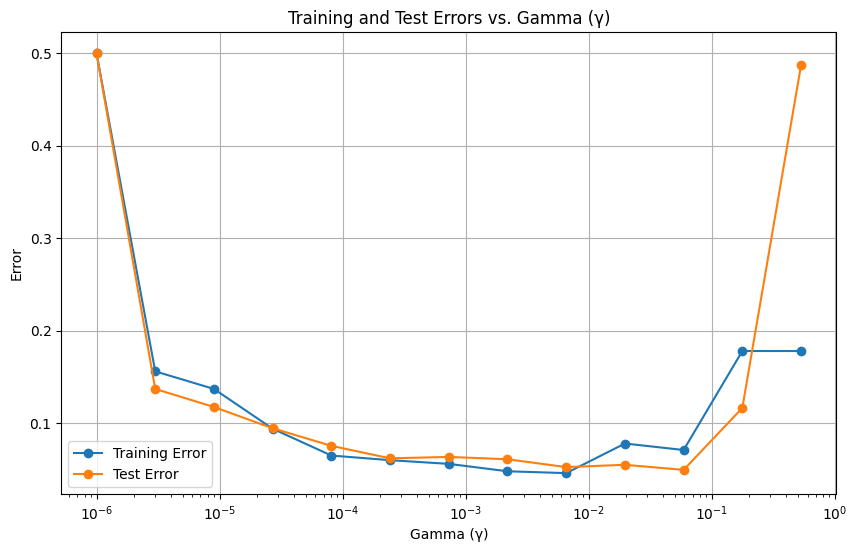

Gamma: 1e-06, Best C: 0.0001
Gamma: 3e-06, Best C: 53.1441
Gamma: 9e-06, Best C: 53.1441
Gamma: 2.7e-05, Best C: 53.1441
Gamma: 8.099999999999999e-05, Best C: 53.1441
Gamma: 0.000243, Best C: 53.1441
Gamma: 0.0007289999999999999, Best C: 17.7147
Gamma: 0.0021869999999999997, Best C: 5.9049000000000005
Gamma: 0.006561, Best C: 1.9683000000000002
Gamma: 0.019683, Best C: 1.9683000000000002
Gamma: 0.059049, Best C: 0.6561
Gamma: 0.177147, Best C: 1.9683000000000002
Gamma: 0.5314409999999999, Best C: 1.9683000000000002

Overall Best Configuration: Gamma: 0.0021869999999999997, C: 1.9683000000000002, CV Error: 0.2130

Train errors:
[np.float64(0.5), np.float64(0.156), np.float64(0.137), np.float64(0.094), np.float64(0.065), np.float64(0.06), np.float64(0.056), np.float64(0.048), np.float64(0.046), np.float64(0.078), np.float64(0.071), np.float64(0.178), np.float64(0.178)]
Test errors:
[np.float64(0.5), np.float64(0.137), np.float64(0.1175), np.float64(0.0945), np.float64(0.0755), np.float64

In [21]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define a logarithmically spaced grid for gamma and C
gamma0 = 1e-6  # Initial value for gamma
beta_gamma = 3  # Base for logarithmic spacing for gamma
num_gamma_values = 13  # Number of gamma values to try
gamma_values = [gamma0 * (beta_gamma ** i) for i in range(num_gamma_values)]

C0 = 1e-4  # Initial value for C
beta_C = 3  # Base for logarithmic spacing for C
num_C_values = 13  # Number of C values to try
C_values = [C0 * (beta_C ** i) for i in range(num_C_values)]

# Initialize variables to store the best configuration
best_score = float('inf')  # Track the lowest cross-validation error
best_gamma = None  # Track the best gamma
best_C = None  # Track the best C

# Initialize lists to store errors
train_errors = []
test_errors = []
best_C_values = []

# Perform k-fold cross-validation to select the optimal C for each gamma
k = 5  # Number of folds for cross-validation

for gamma in gamma_values:
    local_best_score = float('inf')  # Track the best score for this gamma
    local_best_C = None  # Track the best C for this gamma
    
    for C in C_values:
        # Initialize the SVM with RBF kernel
        svm = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
        
        # Perform k-fold cross-validation (use noisy labels)
        cv_error = k_fold_cross_validation(X_train_reduced, y_train_reduced_n, k=k, model=svm, random_state=42)
        
        # Track the best C for this gamma
        if cv_error < local_best_score:
            local_best_score = cv_error
            local_best_C = C
        
        # Track the overall best configuration
        if cv_error < best_score:
            best_score = cv_error
            best_gamma = gamma
            best_C = C
    
    best_C_values.append(local_best_C)
    
    # Train the SVM with the best C for this gamma
    svm = SVC(C=local_best_C, kernel='rbf', gamma=gamma, random_state=42)
    svm.fit(X_train_reduced, y_train_reduced_n)  # Use noisy labels for training
    
    # Compute training and test errors (use noisy labels for training error)
    train_error = compute_error(y_train_reduced, svm.predict(X_train_reduced))
    test_error = compute_error(y_test, svm.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_errors, label='Training Error', marker='o')
plt.plot(gamma_values, test_errors, label='Test Error', marker='o')
plt.xscale('log')  # Use logarithmic scale for gamma
plt.xlabel('Gamma (γ)')
plt.ylabel('Error')
plt.title('Training and Test Errors vs. Gamma (γ)')
plt.legend()
plt.grid()
plt.show()

# Print the optimal gamma and corresponding C values
for gamma, best_C in zip(gamma_values, best_C_values):
    print(f"Gamma: {gamma}, Best C: {best_C}")

# Print the overall best configuration
print(f"\nOverall Best Configuration: Gamma: {best_gamma}, C: {best_C}, CV Error: {best_score:.4f}")

print("\nTrain errors:")
print(train_errors)
print("Test errors:")
print(test_errors)

## Part 3: Neural Networks

Fold 1 error: 0.2350
Fold 2 error: 0.2200
Fold 3 error: 0.2250
Fold 4 error: 0.2650
Fold 5 error: 0.2350
Config: (50,), relu - CV Error: 0.2360
Fold 1 error: 0.2350
Fold 2 error: 0.2350
Fold 3 error: 0.2350
Fold 4 error: 0.2550
Fold 5 error: 0.2300
Config: (50,), tanh - CV Error: 0.2380
Fold 1 error: 0.2250
Fold 2 error: 0.2300
Fold 3 error: 0.2150
Fold 4 error: 0.2550
Fold 5 error: 0.2150
Config: (100,), relu - CV Error: 0.2280
Fold 1 error: 0.2350
Fold 2 error: 0.2300
Fold 3 error: 0.2250
Fold 4 error: 0.2650
Fold 5 error: 0.2550
Config: (100,), tanh - CV Error: 0.2420
Fold 1 error: 0.2150
Fold 2 error: 0.2150
Fold 3 error: 0.2050
Fold 4 error: 0.2650
Fold 5 error: 0.2400
Config: (50, 50), relu - CV Error: 0.2280
Fold 1 error: 0.2050
Fold 2 error: 0.2200
Fold 3 error: 0.2350
Fold 4 error: 0.2650
Fold 5 error: 0.2550
Config: (50, 50), tanh - CV Error: 0.2360
Fold 1 error: 0.2400
Fold 2 error: 0.2200
Fold 3 error: 0.2200
Fold 4 error: 0.2650
Fold 5 error: 0.2150
Config: (100, 50), relu

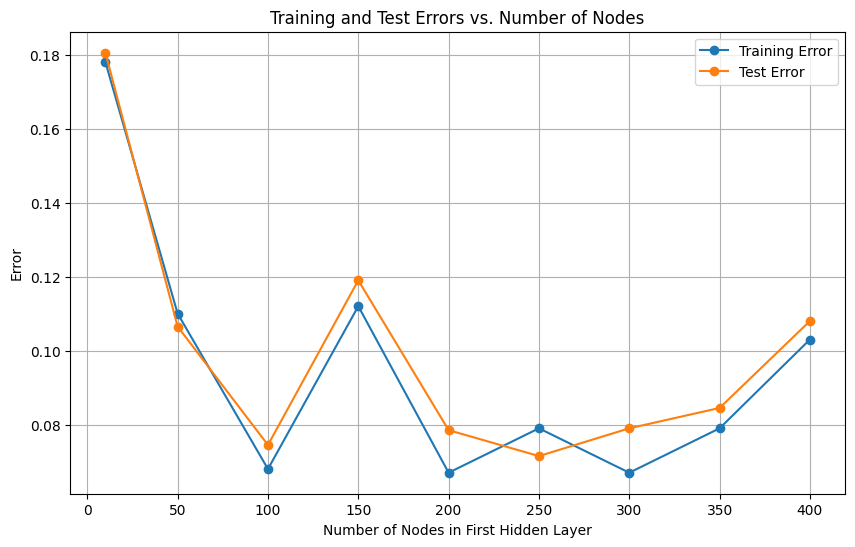

/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 1 - Train Error: 0.3410, Test Error: 0.2555
Epochs: 5 - Train Error: 0.2260, Test Error: 0.1110


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 10 - Train Error: 0.1870, Test Error: 0.0880


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 15 - Train Error: 0.1700, Test Error: 0.0825


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 20 - Train Error: 0.1490, Test Error: 0.0830


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 25 - Train Error: 0.1400, Test Error: 0.0855


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 30 - Train Error: 0.1260, Test Error: 0.0880


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 100 - Train Error: 0.0500, Test Error: 0.1635


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Epochs: 150 - Train Error: 0.0060, Test Error: 0.1840
Epochs: 200 - Train Error: 0.0010, Test Error: 0.1875

Experiment 2: Training and Test Errors vs. Maximum Epochs
Maximum Epochs: [1, 5, 10, 15, 20, 25, 30, 100, 150, 200]
Training Errors: [np.float64(0.341), np.float64(0.226), np.float64(0.187), np.float64(0.17), np.float64(0.149), np.float64(0.14), np.float64(0.126), np.float64(0.05), np.float64(0.006), np.float64(0.001)]
Test Errors: [np.float64(0.2555), np.float64(0.111), np.float64(0.088), np.float64(0.0825), np.float64(0.083), np.float64(0.0855), np.float64(0.088), np.float64(0.1635), np.float64(0.184), np.float64(0.1875)]


/home/name/Documents/notes/5FW25/School/Term2/SENG474/.env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


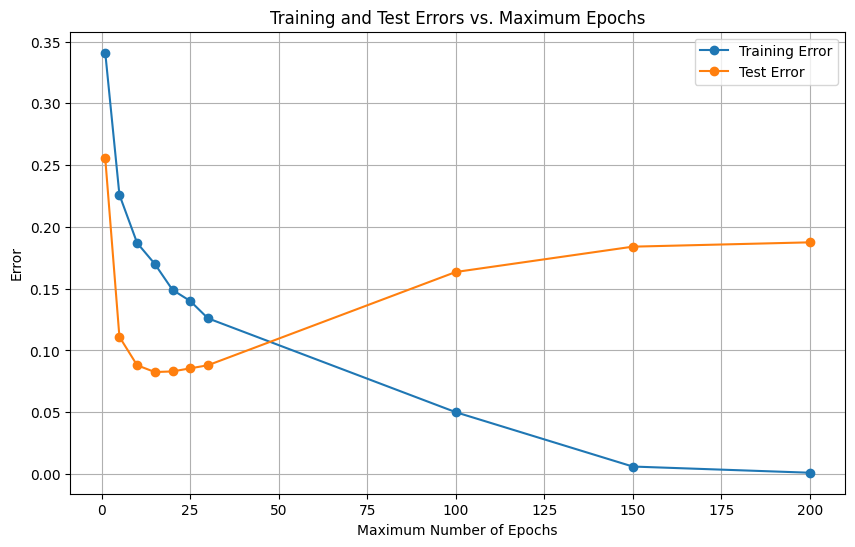

In [15]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define hyperparameter configurations to explore
hidden_layer_configs = [
    (50,),  # One hidden layer with 50 nodes
    (100,),  # One hidden layer with 100 nodes
    (50, 50),  # Two hidden layers with 50 nodes each
    (100, 50),  # Two hidden layers with 100 and 50 nodes
]

activation_functions = ['relu', 'tanh']  # Nonlinearities to try

# Initialize variables to store the best configuration
best_score = float('inf')
best_config = None

# Perform k-fold cross-validation to select the optimal hyperparameters
k = 5  # Number of folds for cross-validation

for hidden_layers in hidden_layer_configs:
    for activation in activation_functions:
        # Initialize the MLPClassifier with increased max_iter and early stopping
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layers,
            activation=activation,
            max_iter=1000,  # Increased number of epochs
            early_stopping=True,  # Enable early stopping
            random_state=42,
        )

        # Perform k-fold cross-validation (use noisy labels)
        cv_error = k_fold_cross_validation(X_train_reduced, y_train_reduced_n, k=k, model=mlp, random_state=42)
        print(f"Config: {hidden_layers}, {activation} - CV Error: {cv_error:.4f}")

        # Track the best configuration
        if cv_error < best_score:
            best_score = cv_error
            best_config = (hidden_layers, activation)

# Print the optimal hyperparameter configuration
print(f"Optimal Configuration: Hidden Layers: {best_config[0]}, Activation: {best_config[1]}")

# Now, perform experiments by varying a single hyperparameter
# Experiment 1: Vary the number of nodes in the first hidden layer
node_values = [10, 50, 100, 150, 200, 250, 300, 350, 400]
train_errors_nodes = []
test_errors_nodes = []

for nodes in node_values:
    mlp = MLPClassifier(
        hidden_layer_sizes=(nodes,),
        activation=best_config[1],  # Use the best activation function
        max_iter=1000,  # Increased number of epochs
        early_stopping=True,  # Enable early stopping
        random_state=42,
    )
    mlp.fit(X_train_reduced, y_train_reduced_n)  # Use noisy labels for training
    train_error = compute_error(y_train_reduced, mlp.predict(X_train_reduced))  # Use noisy labels for evaluation
    test_error = compute_error(y_test, mlp.predict(X_test))
    train_errors_nodes.append(train_error)
    test_errors_nodes.append(test_error)
    print(f"Nodes: {nodes} - Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

# Print graph points for Experiment 1
print("\nExperiment 1: Training and Test Errors vs. Number of Nodes")
print("Number of Nodes:", node_values)
print("Training Errors:", train_errors_nodes)
print("Test Errors:", test_errors_nodes)

# Plot the results for Experiment 1
plt.figure(figsize=(10, 6))
plt.plot(node_values, train_errors_nodes, label='Training Error', marker='o')
plt.plot(node_values, test_errors_nodes, label='Test Error', marker='o')
plt.xlabel('Number of Nodes in First Hidden Layer')
plt.ylabel('Error')
plt.title('Training and Test Errors vs. Number of Nodes')
plt.legend()
plt.grid()
plt.show()

# Experiment 2: Vary the maximum number of epochs
epoch_values = [1, 5, 10, 15, 20, 25, 30, 100, 150, 200]  # Added 1000 epochs
train_errors_epochs = []
test_errors_epochs = []

for epochs in epoch_values:
    mlp = MLPClassifier(
        hidden_layer_sizes=best_config[0],  # Use the best hidden layer configuration
        activation=best_config[1],  # Use the best activation function
        max_iter=epochs,
        early_stopping=False,  # Disable early stopping for this experiment
        random_state=42,  # Fixed random state for reproducibility
    )
    mlp.fit(X_train_reduced, y_train_reduced_n)  # Use noisy labels for training
    train_error = compute_error(y_train_reduced_n, mlp.predict(X_train_reduced))  # Use noisy labels for evaluation
    test_error = compute_error(y_test, mlp.predict(X_test))
    train_errors_epochs.append(train_error)
    test_errors_epochs.append(test_error)
    print(f"Epochs: {epochs} - Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

# Print graph points for Experiment 2
print("\nExperiment 2: Training and Test Errors vs. Maximum Epochs")
print("Maximum Epochs:", epoch_values)
print("Training Errors:", train_errors_epochs)
print("Test Errors:", test_errors_epochs)

# Plot the results for Experiment 2
plt.figure(figsize=(10, 6))
plt.plot(epoch_values, train_errors_epochs, label='Training Error', marker='o')
plt.plot(epoch_values, test_errors_epochs, label='Test Error', marker='o')
plt.xlabel('Maximum Number of Epochs')
plt.ylabel('Error')
plt.title('Training and Test Errors vs. Maximum Epochs')
plt.legend()
plt.grid()
plt.show()

## Part 4: Comparison

In [22]:
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import norm

# Optimal configurations from previous parts
optimal_linear_svm_config = {'C': 0.008}
optimal_gaussian_svm_config = {'gamma': 0.002187, 'C': 1.9683}
optimal_nn_config = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'max_iter': 1000}

# Function to compute confidence intervals
def compute_confidence_interval(error, n, confidence_level=0.95):
    z = norm.ppf(1 - (1 - confidence_level) / 2)
    se = np.sqrt(error * (1 - error) / n)  # Standard error
    return error - z * se, error + z * se

# Train and evaluate the optimally tuned linear SVM
linear_svm = LinearSVC(C=optimal_linear_svm_config['C'], random_state=42)
linear_svm.fit(X_train_reduced, y_train_reduced_n)
linear_svm_test_error = compute_error(y_test, linear_svm.predict(X_test))
linear_svm_ci = compute_confidence_interval(linear_svm_test_error, len(y_test))

# Train and evaluate the optimally tuned Gaussian kernel SVM
gaussian_svm = SVC(C=optimal_gaussian_svm_config['C'], gamma=optimal_gaussian_svm_config['gamma'], random_state=42)
gaussian_svm.fit(X_train_reduced, y_train_reduced_n)
gaussian_svm_test_error = compute_error(y_test, gaussian_svm.predict(X_test))
gaussian_svm_ci = compute_confidence_interval(gaussian_svm_test_error, len(y_test))

# Train and evaluate the optimally tuned neural network
nn = MLPClassifier(
    hidden_layer_sizes=optimal_nn_config['hidden_layer_sizes'],
    activation=optimal_nn_config['activation'],
    max_iter=optimal_nn_config['max_iter'],
    early_stopping=True,
    random_state=42
)
nn.fit(X_train_reduced, y_train_reduced_n)
nn_test_error = compute_error(y_test, nn.predict(X_test))
nn_ci = compute_confidence_interval(nn_test_error, len(y_test))

# Print the results
print("Optimal Linear SVM Test Error: {:.4f} (95% CI: [{:.4f}, {:.4f}])".format(
    linear_svm_test_error, linear_svm_ci[0], linear_svm_ci[1]))
print("Optimal Gaussian Kernel SVM Test Error: {:.4f} (95% CI: [{:.4f}, {:.4f}])".format(
    gaussian_svm_test_error, gaussian_svm_ci[0], gaussian_svm_ci[1]))
print("Optimal Neural Network Test Error: {:.4f} (95% CI: [{:.4f}, {:.4f}])".format(
    nn_test_error, nn_ci[0], nn_ci[1]))

# Compare the results
if linear_svm_ci[1] < gaussian_svm_ci[0]:
    print("\nThe Gaussian Kernel SVM significantly outperforms the Linear SVM.")
elif gaussian_svm_ci[1] < linear_svm_ci[0]:
    print("\nThe Linear SVM significantly outperforms the Gaussian Kernel SVM.")
else:
    print("\nThere is no significant difference between the Linear SVM and Gaussian Kernel SVM.")

if gaussian_svm_ci[1] < nn_ci[0]:
    print("The Gaussian Kernel SVM significantly outperforms the Neural Network.")
elif nn_ci[1] < gaussian_svm_ci[0]:
    print("The Neural Network significantly outperforms the Gaussian Kernel SVM.")
else:
    print("There is no significant difference between the Gaussian Kernel SVM and the Neural Network.")

if linear_svm_ci[1] < nn_ci[0]:
    print("The Linear SVM significantly outperforms the Neural Network.")
elif nn_ci[1] < linear_svm_ci[0]:
    print("The Neural Network significantly outperforms the Linear SVM.")
else:
    print("There is no significant difference between the Linear SVM and the Neural Network.")

Optimal Linear SVM Test Error: 0.0790 (95% CI: [0.0672, 0.0908])
Optimal Gaussian Kernel SVM Test Error: 0.0685 (95% CI: [0.0574, 0.0796])
Optimal Neural Network Test Error: 0.0745 (95% CI: [0.0630, 0.0860])

There is no significant difference between the Linear SVM and Gaussian Kernel SVM.
There is no significant difference between the Gaussian Kernel SVM and the Neural Network.
There is no significant difference between the Linear SVM and the Neural Network.
